In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')

#### Задание №1

In [27]:
from sklearn.datasets import load_boston

In [30]:
boston = load_boston()

data = boston.data
target = boston.target 
feature_names = boston.feature_names

In [31]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [34]:
# Разбиение данных на тренировочный и тестовый датасеты

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Масштабируем данные

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [38]:
from sklearn.manifold import TSNE

In [39]:
# Строим модель TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [40]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

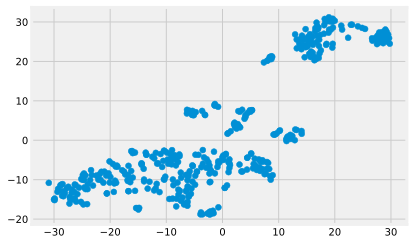

In [43]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание №2

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=3)

In [49]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

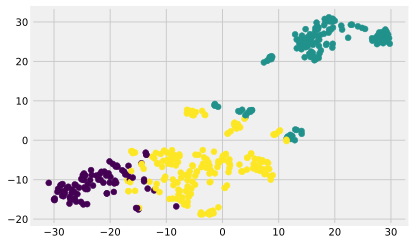

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [57]:
# Вычисляем средние знаяения price и CRIM в каждом кластере

for i in range(3):
    print(f'{i + 1} кластер: {y_train[labels_train == i].mean()}\n CRIM:', X_train.loc[labels_train == i, 'CRIM'].mean())

1 кластер: price    27.788372
dtype: float64
 CRIM: 0.07356558139534886
2 кластер: price    16.165354
dtype: float64
 CRIM: 10.797028425196853
3 кластер: price    24.958115
dtype: float64
 CRIM: 0.42166020942408367


#### Задание №3

In [58]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = model.fit_predict(X_test_scaled)

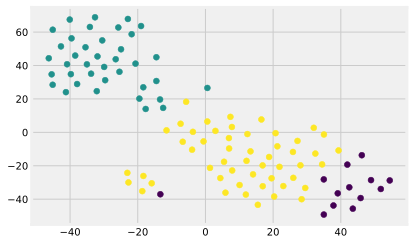

In [60]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [61]:
for i in range(3):
    print(f'{i + 1} кластер: {y_test[labels_test == i].mean()}\n CRIM:', X_test.loc[labels_test == i, 'CRIM'].mean())

1 кластер: price    34.553846
dtype: float64
 CRIM: 0.08308461538461537
2 кластер: price    16.710526
dtype: float64
 CRIM: 9.419181842105264
3 кластер: price    21.717647
dtype: float64
 CRIM: 0.22250117647058823
